## Import Dependancies

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KDTree
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from wordcloud import WordCloud, STOPWORDS
#from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# File to Load (Remember to Change These)
data = "../Resources/FINAL_CLEAN_FILE.csv"

# read to dataframe
data_df = pd.read_csv(data)
data_df.head()

,VAERS_ID,SYMPTOM,ASSIGNED_GROUP,SEVERITY_LEVEL,DIED,L_THREAT,HOSPITAL,AGE_YRS,AGE_GROUP,OTHER_MEDS,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,916600,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,33.0,26-35,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,917168,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,64.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
2,918386,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,62.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
3,918393,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,62.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
4,918479,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,37.0,36-45,1.0,...,1.0,0,0,1,0,0,0,0,0,0


In [3]:
severity = data_df['SEVERITY_LEVEL'].unique()

## Prep Data For Model

In [4]:
# create train data
X = data_df.drop(['VAERS_ID', 'SYMPTOM','ASSIGNED_GROUP','SEVERITY_LEVEL','HOSPITAL','AGE_YRS', 'AGE_GROUP'], axis=1)
X

,DIED,L_THREAT,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
26478,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0
26479,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0
26480,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0


In [5]:
# convert the serverity labels to numbers and create the target data
y = LabelEncoder().fit_transform(data_df['SEVERITY_LEVEL'])
y

array([0, 0, 0, ..., 2, 1, 1])

In [6]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [7]:
# Scaling the train data with StandardScaler()
#scaler = StandardScaler().fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

## Testing KNN to Determine Best k value

k: 1, Train/Test Score: 0.877/0.837
k: 3, Train/Test Score: 0.899/0.884
k: 5, Train/Test Score: 0.902/0.895
k: 7, Train/Test Score: 0.902/0.897
k: 9, Train/Test Score: 0.901/0.898
k: 11, Train/Test Score: 0.901/0.899
k: 13, Train/Test Score: 0.900/0.900
k: 15, Train/Test Score: 0.900/0.899
k: 17, Train/Test Score: 0.900/0.900
k: 19, Train/Test Score: 0.900/0.900


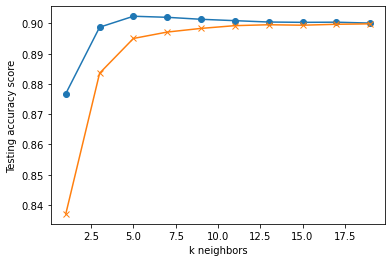

In [8]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

Based on the scores above, we will move forward with 5 neighbors for our model. This was run on 3 random states (33, 42, 7) and all began to stabilize at k=5. 

## Create KNN Model 

In [10]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Test Acc: 0.837


In [ ]:
X.columns

### Test Prediction 1

In [11]:
# Sample Prediction 1
sample_user1 = [[0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1]]
predicted_symptoms = knn.predict(sample_user1)
print(severity[predicted_symptoms])

['MILD']


In [14]:
# Sample Prediction 2 (return severe)
sample_user3 = [[1,1,20,20,1,1,1,1,1,1,20,1,1,0,1,1,1,20,1,1,20,0,20,20,20]]
knn.predict(sample_user3)

array([0])

In [15]:
# 5 people closest to user 1
tree = KDTree(X)
dist, ind = tree.query(sample_user1, k=200)

#convery ndarry to list 
like_users = ind[0].tolist()
print(like_users)  # indices of 5 closest neighbors

[13702, 23393, 8699, 18950, 18121, 25494, 23939, 331, 19482, 19365, 3430, 4456, 12547, 3800, 1812, 22351, 20555, 13490, 19362, 16094, 3192, 11461, 3293, 6189, 4382, 23873, 22511, 22361, 20960, 19861, 17517, 18353, 18755, 18313, 14856, 12567, 11779, 10731, 11656, 6959, 9349, 6553, 1551, 595, 1533, 2386, 5829, 23841, 20500, 20970, 26302, 10308, 24432, 21939, 22127, 22689, 10306, 20343, 13563, 15638, 19719, 13559, 23572, 19671, 18662, 18589, 25846, 24023, 24089, 18166, 5202, 26061, 8676, 129, 10386, 23865, 11628, 11943, 7189, 7095, 9320, 7978, 23436, 1560, 1385, 1651, 2717, 21779, 26185, 19151, 24962, 26082, 21612, 25784, 3152, 11008, 25986, 23872, 24473, 21187, 24071, 23956, 18956, 20757, 21870, 15727, 16281, 26417, 2477, 25083, 22834, 26087, 26213, 15370, 21105, 24629, 25894, 23917, 22386, 4105, 10715, 24889, 11724, 25914, 17599, 26106, 18955, 11286, 24888, 18945, 24155, 6560, 25353, 26094, 25352, 2519, 11263, 25359, 24223, 24449, 25761, 23924, 26143, 10423, 26135, 16724, 24288, 25942, 

In [51]:
# save nearest 100 neighbors symptoms as list for wordcloud
predicted_symptoms = data_df['ASSIGNED_GROUP'].iloc[like_users]
predicted_symptoms = predicted_symptoms.value_counts()
predicted_symptoms.head()

Injection Site Irritation/Discomfort    23
Respiratory distress                    10
Fever                                    8
Chills                                   7
Cardiac arrest                           7
Name: ASSIGNED_GROUP, dtype: int64

In [73]:
dirty_dict = predicted_symptoms.to_dict()

In [78]:
words = []
for key in dirty_dict:
    x = {'x': key, 'value': dirty_dict[key]}
    words.append(x)
    
words

[{'x': 'Injection Site Irritation/Discomfort', 'value': 23},
 {'x': 'Respiratory distress', 'value': 10},
 {'x': 'Fever', 'value': 8},
 {'x': 'Chills', 'value': 7},
 {'x': 'Cardiac arrest', 'value': 7},
 {'x': 'Joint Pain/Discomfort', 'value': 6},
 {'x': 'Nausea/Vomiting', 'value': 6},
 {'x': 'Loss of Consciousness', 'value': 6},
 {'x': 'Delirium', 'value': 5},
 {'x': 'Vertigo', 'value': 5},
 {'x': 'Weakness', 'value': 5},
 {'x': 'Fatigue', 'value': 5},
 {'x': 'General Pain/Discomfort', 'value': 5},
 {'x': 'Migraine/Headache', 'value': 5},
 {'x': 'Chest Discomfort', 'value': 5},
 {'x': 'Pulmonary', 'value': 4},
 {'x': 'Abdominal Pain/Discomfort', 'value': 4},
 {'x': 'Heart Attack', 'value': 4},
 {'x': 'Abnormal Heart Rhythm', 'value': 4},
 {'x': 'Current Medical Condition Aggravated', 'value': 4},
 {'x': 'Blood Pressure Change', 'value': 3},
 {'x': 'Resuscitation - reviving', 'value': 3},
 {'x': 'Skin Discomfort/Pain', 'value': 3},
 {'x': 'Anaphylactic reaction', 'value': 3},
 {'x': 'A

In [16]:
# save nearest 100 neighbors symptoms as list for wordcloud
predicted_symptoms = data_df['ASSIGNED_GROUP'].iloc[like_users].tolist()
predicted_symptoms[:5]

['Sensitivity',
 'Vertigo',
 'Migraine/Headache',
 'Current Medical Condition Aggravated',
 'Nausea/Vomiting']

In [ ]:
# save nearest 100 neighbors severity levels as list for % tables
predicted_severity = data_df['SEVERITY_LEVEL'].iloc[like_users].tolist()
predicted_severity[:5]

In [ ]:
# count the number of occurrences from nearest neighboors
def count_levels(lst):
    mld_ct = 0
    mod_ct = 0
    sev_ct = 0 
    for person in lst:
        if (person == 'MILD'):
            mld_ct = mld_ct + 1
        if (person == 'MODERATE'):
            mod_ct = mod_ct + 1
        if (person == 'SEVERE'):
            sev_ct = sev_ct + 1    
            
    return mld_ct, mod_ct, sev_ct

In [ ]:
count_levels(predicted_severity)

In [ ]:
cloud_maker(predicted_symptoms)

In [ ]:
# save nearest 50 neighbors symptoms as list for wordcloud
predicted_symptoms = data_df['ASSIGNED_GROUP'].iloc[like_users].tolist()
predicted_symptoms[:5]

In [ ]:
def cloud_maker(words):
    #convert list to string and generate
    unique_string=(" ").join(predicted_symptoms)

    #create circle mask
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    
    wordcloud = WordCloud(background_color="white", repeat=True,
                width = 1000, height = 500, mask=mask).generate(unique_string)
    
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("curr_cloud.png", bbox_inches='tight')
    plt.show()
    plt.close()

In [ ]:
cloud_maker(predicted_symptoms)

In [ ]:
severity

In [ ]:
#convert list to string and generate
unique_string=(" ").join(predicted_symptoms)

#create circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


#test mask
from PIL import Image
from os import path
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
new_mask = np.array(Image.open(path.join(d, 'circle_mask.png')))

wordcloud = WordCloud(background_color="white", repeat=True,
                      width = 1000, height = 500, mask=mask).generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# Sample Prediction 2
sample_user2 = [[0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]]
predicted_symptoms = knn.predict(sample_user2)
print(severity[predicted_symptoms])

In [ ]:
predicted_severity = data_df['SEVERITY_LEVEL'].iloc[like_users].tolist()
predicted_severity[:5]

In [ ]:
count_levels(predicted_severity)

In [ ]:
tree = KDTree(X)
ind = tree.query([[1.25, 1.35]], k=5)
print(ind)  # indices of 5 closest neighbors


print('People like you reported the following symptoms:')